<p><font size="6" color='grey'> <b>

Generative KI. Verstehen. Anwenden. Gestalten.
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
Agenten
</b></font> </br></p>


---

In [1]:
#@title 🔧 Umgebung einrichten{ display-mode: "form" }
!uv pip install --system -q git+https://github.com/ralf-42/GenAI.git#subdirectory=04_modul
from genai_lib.utilities import (
    check_environment,
    get_ipinfo,
    setup_api_keys,
    mprint,
    install_packages,
    mermaid,
    get_model_profile,
    extract_thinking,
    load_prompt
)
setup_api_keys(['OPENAI_API_KEY', 'SERPAPI_API_KEY'], create_globals=False)
print()
check_environment()
print()
get_ipinfo()

✓ OPENAI_API_KEY erfolgreich gesetzt
✓ SERPAPI_API_KEY erfolgreich gesetzt

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Installierte LangChain- und LangGraph-Bibliotheken:
langchain                                1.2.8
langchain-chroma                         1.1.0
langchain-classic                        1.0.1
langchain-community                      0.4.1
langchain-core                           1.2.9
langchain-ollama                         1.0.1
langchain-openai                         1.1.8
langchain-text-splitters                 1.1.0
langgraph                                1.0.7
langgraph-checkpoint                     4.0.0
langgraph-prebuilt                       1.0.7
langgraph-sdk                            0.3.3

IP-Adresse: 34.57.111.98
Hostname: 98.111.57.34.bc.googleusercontent.com
Stadt: Council Bluffs
Region: Iowa
Land: US
Koordinaten: 41.2619,-95.8608
Provider: AS396982 Google LLC
Postleitzahl: 51502
Zeitzone: America/Chicago


In [2]:
#@title 🛠️ Installationen { display-mode: "form" }
install_packages([('google-search-results', 'serpapi'), 'ddgs', 'wikipedia'])

🔄 Installiere google-search-results...
✅ google-search-results erfolgreich installiert und importiert
🔄 Installiere ddgs...
✅ ddgs erfolgreich installiert und importiert
🔄 Installiere wikipedia...
✅ wikipedia erfolgreich installiert und importiert


<p><font color='black' size="5">
⏸️ 5-Minuten-Check:
</font></p>

**Ziel:** Prüfen, ob du das vorherige Kapitel verstanden hast – nicht, ob es gerade läuft.

**Aufgabe** (5 Minuten, ohne Vorlage):

Rekonstruiere die zentrale Idee oder Code-Struktur des letzten Abschnitts selbstständig
(kein Copy & Paste, kein Nachschlagen).

Wähle eine der folgenden Optionen:

+ Erkläre in 1–2 Sätzen, was hier konzeptionell passiert.

+ Verändere eine Kleinigkeit (z. B. Prompt, Parameter, Reihenfolge) und beschreibe die Auswirkung.

+ Markiere eine Stelle, die du nicht sicher erklären kannst, und formuliere eine konkrete Frage dazu.

**Hinweis:**
Nicht alles muss „fertig" oder „korrekt" sein. Entscheidend ist, wo dein Verständnis gerade endet

# 1 | Was ist ein echter Agent?
---

Wenn man sich mit generativer KI beschäftigt, stößt man früher oder später auf den Begriff **Agent** – also ein System, das Aufgaben eigenständig ausführt. Doch was genau ist ein *„echter“* Agent? Muss er vollständig autonom sein? Solche Fragen führen schnell zu endlosen Grundsatzdiskussionen – und genau das ist nicht hilfreich, wenn man einfach anfangen möchte, mit GenAI zu arbeiten.

<img src="https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/agentisch_1.png" class="logo" width="500"/>



Der bekannte KI-Experte **Andrew Ng** hat einen anderen, praktischeren Vorschlag gemacht: Statt darüber zu streiten, ob etwas ein Agent ist oder nicht, sollten wir lieber davon sprechen, wie **agentisch** ein System ist – also wie **selbstständig** es arbeitet. So kann man sich auf das konzentrieren, was wirklich zählt: Was kann das System leisten, und wo kann es sinnvoll eingesetzt werden?



<img src="https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/agentisch_2.png" class="logo" width="900"/>



Besonders einfach ist der Einstieg bei eher einfachen Aufgaben – also bei Prozessen, die heute noch manuell erledigt werden, wie das Ausfüllen von Formularen, das Nachschlagen in einer Datenbank oder das Kopieren von Informationen zwischen verschiedenen Systemen. Diese Aufgaben lassen sich gut in sogenannte agentische Workflows überführen – also in Abläufe, bei denen die KI (teilweise) selbstständig handelt.


Natürlich gibt es auch deutlich komplexere Anwendungen, bei denen die KI viele Entscheidungen trifft, Schleifen durchläuft und sich an neue Situationen anpasst. Solche Systeme sind spannend – aber gerade für den Anfang ist es oft sinnvoller, mit kleineren, überschaubaren Schritten zu starten. Dort liegen aktuell auch die meisten Chancen, GenAI im Alltag oder im Beruf sinnvoll einzusetzen.



**Beispiele:**

| Autonomiegrad      | Entscheidungsspielraum                         | Beispielhafter Agent                             | Kontrolle | Vorhersagbarkeit | Konkreter Anwendungsfall                                                                                                                                      |
|--------------------|------------------------------------------------|--------------------------------------------------|----------|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Niedrig            | Keine – fester Ablauf                          | Skript mit harter Toolverkettung                | Hoch     | Voll             | Unterrichts-Agent, der immer: (1) feste Suchbegriffe zu „schwarzen Löchern" nutzt, <br>(2) definierte Seiten lädt und (3) aus diesen Quellen einen Aufsatz schreibt. |
| Mittel (semi)      | Einige Entscheidungen erlaubt                  | Agent wählt Tools aus vordefinierter Liste      | Mittel   | Hoch bis mittel  | Recherche-Agent, der bei „Aufsatz über schwarze Löcher" selbst entscheidet, ob er <br>Websuche, News-Suche oder Papers (arXiv) nutzt und wie viele Seiten er lädt. |
| Hoch               | Plant und handelt weitgehend selbstständig     | Agent erstellt Tools oder neue Strategien       | Niedrig  | Gering           | Forschungs-Agent, der nur das Ziel „aktuelle Übersicht zu schwarzer-Loch-Forschung" <br>bekommt, selbst Rechercheplan, Toolaufrufe und ggf. eigenen Parser-Code entwickelt. |

**Fazit:**     
Es muss nicht gleich ein „superintelligenter“ Agent sein. Besser ist es, pragmatisch zu denken, einfache Prozesse zu automatisieren – und so Schritt für Schritt Erfahrungen zu sammeln.



<br>

**Agenten erweitern LLMs**

Agenten sind mehr als nur Sprachmodelle. Sie verbinden die Sprachfähigkeiten eines LLMs mit praktischer Handlungsfähigkeit:

+ LLM als Denkmodul: Das LLM übernimmt das Sprachverständnis und das logische Schlussfolgern.

+ Erweiterbarkeit durch Tools: Agenten greifen z. B. auf Web, Datenbanken oder externe APIs zu.

+ Transparenter Denkprozess: Der Agent zeigt, wie er zum Ergebnis kommt – ideal zum Lernen und Verstehen.

+ Entscheidungen treffen: Agenten analysieren, planen und wählen aus mehreren Optionen – nicht nur einmal, sondern iterativ.

# 2 | Anatomie eines Agenten
---

**Was macht einen KI-Agenten aus?**

Ein Agent ist mehr als ein LLM mit Werkzeugen. Er arbeitet nicht nur reaktiv, sondern verfolgt Ziele, trifft Entscheidungen und passt sein Verhalten an. Um das zu erreichen, braucht er eine klar definierte Architektur – sonst bleibt er ein Tool-Controller statt ein intelligentes System.




**Die 6 Kernkomponenten eines Agenten**

Diese Komponenten bilden ein vollständiges Agentenmodell. Fehlt eine davon, kommt der Agent schnell an seine Grenzen (z. B. endlose Schleifen, fehlende Zielorientierung, chaotische Tool-Nutzung).

| Komponente                        | Rolle im Agenten                                                                |
| --------------------------------- | ------------------------------------------------------------------------------- |
| **1. Wahrnehmung (Perception)**   | Versteht Eingaben aus der Umgebung – Sprache, Sensoren, API-Ergebnisse.         |
| **2. Ziel- & Aufgabenmanagement** | Verwaltet Ziele, priorisiert Aufgaben, kennt Abbruchkriterien.                  |
| **3. Reasoning & Planung**        | Entwickelt Strategien, zerlegt Aufgaben und passt den Plan bei Fehlschlägen an. |
| **4. Tools & Aktionen**           | Interagiert mit der Außenwelt – über APIs, Datenbanken, Code, Hardware etc.     |
| **5. Gedächtnis & Kontext**       | Speichert Wissen, Verlauf und Zustände – kurzfristig oder langfristig.          |
| **6. Monitoring & Feedback**      | Bewertet Handlungen, erkennt Fehlverhalten und optimiert Strategien.            |

*Das LLM ist dabei **eine mögliche Komponente**, meist im Bereich Reasoning/Planung – aber es ist nicht der Agent selbst.*




**Der Denk- und Handlungszyklus**

Ein Agent verarbeitet Informationen nicht linear wie ein LLM, sondern dynamisch und kontrolliert. Typischer Ablauf:

1. **Verstehen** → Eingabe interpretieren, Kontext bestimmen
2. **Ziel definieren / überprüfen**
3. **Plan entwickeln** → einzelne Schritte bestimmen
4. **Handeln** → Tools einsetzen, Daten abrufen, Aktionen durchführen
5. **Auswerten** → Erfolg/Misserfolg erkennen
6. **Lernen / Anpassen** → Strategie ändern oder Ziel neu formulieren
7. **Antwort geben oder weiterarbeiten**

Dieser Zyklus kann mehrfach durchlaufen werden – oder dauerhaft aktiv bleiben (autonomer Modus).


Ein Agent ist ein **entscheidungsfähiges System**, kein schnell zusammengebauter Prompt mit Tools. Erst wenn Zielmanagement, Gedächtnis, Feedback und Handlungskompetenz zusammenspielen, entsteht echte Intelligenz – und erst dann sind Agenten produktiv einsetzbar.


# 3 | Direkter Vergleich
---

## 3.1 Setup und Tools

Bevor wir vergleichen können, müssen wir die notwendigen Tools für unseren Agenten definieren. Diese Tools repräsentieren die erweiterten Fähigkeiten, die einem einfachen LLM fehlen.



Der `@tool`-Decorator aus langchain_core.tools wandelt normale Python-Funktionen automatisch in LangChain-Tools um, die Agents/LLMs aufrufen können. Er extrahiert Name (Funktionsname), Beschreibung (Docstring) und Parameter (Type-Hints/Signature) und erzeugt eine JSON-Schema-kompatible Tool-Definition.

In [3]:
#@title 🔧 Agenten-Tools { display-mode: "form" }

# ═══════════════════════════════════════════════════════════
# Alle Tool-Definitionen (zentral, werden in Abschnitt 3 und 4 wiederverwendet)
# ═══════════════════════════════════════════════════════════
from langchain_core.tools import tool
from langchain_community.utilities.serpapi import SerpAPIWrapper
from langchain_community.utilities import WikipediaAPIWrapper
from serpapi import GoogleSearch
import os, io, sys

# ---- calculator
@tool
def calculator(expression: str) -> str:
    """Präzise mathematische Berechnungen durchführen.

    Args:
        expression: Mathematischer Ausdruck, z.B. '2847 * 1923'
    """
    try:
        if any(x in expression for x in ['import', 'exec', '__']):
            return "Unsichere Operation"
        result = eval(expression)
        return f"{expression} = {result}"
    except:
        return "Berechnungsfehler"

# ---- search
@tool
def search(query: str) -> str:
    """Aktuelle Informationen im Internet suchen (News, Fakten, Daten, Wetter).

    Args:
        query: Suchbegriff in natürlicher Sprache
    """
    try:
        serpapi = SerpAPIWrapper(params={"engine": "google"})
        original_stdout = sys.stdout
        sys.stdout = io.StringIO()
        try:
            result = serpapi.run(query)
        finally:
            sys.stdout = original_stdout

        if not result or result.strip() == "":
            return f"Keine Suchergebnisse für '{query}' gefunden."
        return result
    except Exception as e:
        error_msg = str(e)
        if "JSONDecodeError" in error_msg or "Expecting value" in error_msg:
            return f"SerpAPI-Fehler: Leere oder ungültige API-Antwort für '{query}'."
        return f"Suchfehler für '{query}': {error_msg}"

# ---- stock_price
@tool
def stock_price(ticker: str) -> str:
    """Aktuelle Börsenkurse abrufen via Google Finance.

    Args:
        ticker: Ticker im Format SYMBOL:BÖRSE, z.B. RHM:ETR (Rheinmetall XETRA),
                SAP:ETR (SAP), BMW:ETR (BMW), VOW3:ETR (VW), SIE:ETR (Siemens)
    """
    try:
        params = {
            "engine": "google_finance",
            "q": ticker,
            "hl": "de",
            "api_key": os.environ.get("SERPAPI_API_KEY")
        }
        results = GoogleSearch(params).get_dict()

        summary = results.get("summary", {})
        price = summary.get("price")
        currency = summary.get("currency")
        change = summary.get("price_change")
        change_pct = summary.get("price_change_percentage")
        stock_name = summary.get("title", ticker)
        exchange = summary.get("stock", ticker)

        if price:
            parts = [f"{stock_name} ({exchange}): {price} {currency or ''}"]
            if change is not None and change_pct is not None:
                direction = "📈" if float(str(change).replace(",", ".")) >= 0 else "📉"
                parts.append(f"{direction} Veränderung: {change} ({change_pct}%)")
            return " | ".join(parts)

        return f"Keine Kursdaten für '{ticker}' gefunden. API-Antwort: {results.get('error', 'unbekannt')}"
    except Exception as e:
        return f"Fehler bei Kursabfrage für {ticker}: {str(e)}"

# ---- read_file
@tool
def read_file(filename: str) -> str:
    """Datei vom Dateisystem lesen und Inhalt zurückgeben.

    Args:
        filename: Pfad zur Datei, z.B. 'notiz.txt'
    """
    try:
        with open(filename, 'r') as f:
            return f.read()
    except:
        return f"Datei {filename} nicht gefunden"

# ---- write_file
@tool
def write_file(filename: str, content: str) -> str:
    """Datei erstellen oder überschreiben mit angegebenem Inhalt.

    Args:
        filename: Pfad zur Datei, z.B. 'notiz.txt'
        content: Text-Inhalt der Datei
    """
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(content)
        return f"Datei {filename} erfolgreich geschrieben."
    except Exception as e:
        return f"Fehler beim Schreiben der Datei: {str(e)}"

# ---- wiki
@tool
def wiki(term: str) -> str:
    """Einen Begriff in Wikipedia nachschlagen und Zusammenfassung abrufen.

    Args:
        term: Suchbegriff, z.B. 'Taylor Swift' oder 'Quantencomputer'
    """
    wiki_api = WikipediaAPIWrapper()
    try:
        return wiki_api.run(term)
    except Exception as e:
        return f"Wikipedia-Fehler: {e}"


# ═══════════════════════════════════════════════════════════
# Tool-Listen für die verschiedenen Abschnitte
# ═══════════════════════════════════════════════════════════
tools = [calculator, search, stock_price, read_file, write_file, wiki]

print("✅ Alle Tools definiert:")
for t in tools:
    print(f" • {t.name:18s}:  {t.description.splitlines()[0]}")

✅ Alle Tools definiert:
 • calculator        :  Präzise mathematische Berechnungen durchführen.
 • search            :  Aktuelle Informationen im Internet suchen (News, Fakten, Daten, Wetter).
 • stock_price       :  Aktuelle Börsenkurse abrufen via Google Finance.
 • read_file         :  Datei vom Dateisystem lesen und Inhalt zurückgeben.
 • write_file        :  Datei erstellen oder überschreiben mit angegebenem Inhalt.
 • wiki              :  Einen Begriff in Wikipedia nachschlagen und Zusammenfassung abrufen.


## 3.2 Vergleichstest

Wir verwenden eine Frage, die sowohl aktuelle Daten als auch eine Berechnung erfordert, um die Grenzen eines LLMs und die Stärken eines Agenten zu demonstrieren.

<p><font color='black' size="5">
Basismodell
</font></p>

In [4]:
# Alle Imports
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import SystemMessage
from langchain.chat_models import init_chat_model
from langchain.agents import create_agent

import time

In [5]:
# LLM (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0.0)

# Test-Frage die Grenzen aufzeigt
test_question = "Wie ist das Wetter in Berlin, was ist 2847 * 1923, wie ist der heutige XETRA (in EURO) Kurs der Aktie von Rheinmetall? Halte dich konsequent an die zu beantwortenden Fragen."

<p><font color='black' size="5">
LLM only
</font></p>

In [6]:
# 1. EINFACHES LLM PROBIEREN
mprint("### 1️⃣ EINFACHES LLM:")
mprint("---")

start_time = time.time()
llm_response = llm.invoke(test_question)
llm_time = time.time() - start_time

mprint(f"**Antwort:** {llm_response.content}")
mprint(f"**Zeit:** {llm_time:.2f}s")

### 1️⃣ EINFACHES LLM:

---

**Antwort:** 1. **Wetter in Berlin**: Ich kann keine aktuellen Wetterdaten bereitstellen. Bitte überprüfen Sie eine Wetter-App oder Website für die neuesten Informationen.

2. **2847 * 1923**: Das Ergebnis dieser Multiplikation ist 5.475.801.

3. **XETRA-Kurs der Aktie von Rheinmetall**: Ich habe keinen Zugriff auf aktuelle Finanzdaten. Bitte konsultieren Sie eine Finanzwebsite oder App für den aktuellen Kurs.

**Zeit:** 2.06s

<p><font color='black' size="5">
Agent
</font></p>

In [7]:
# 2. AGENT MIT TOOLS
mprint("### 2️⃣ AGENT MIT TOOLS:")
mprint("---")

# Agent mit create_agent erstellen
agent = create_agent(
    model=llm,
    tools=tools,
    system_prompt="""Du bist ein hilfreicher Agent. Beantworte ALLE Teile einer Frage vollständig.
Nutze für jede Teilfrage das passende Tool:
- calculator: für Berechnungen
- stock_price: für Aktienkurse (Ticker im Format SYMBOL:BÖRSE, z.B. RHM:ETR)
- search: für aktuelle Informationen (Wetter, News, Fakten)
Formatiere das Ergebnis im Markdown-Format, Formeln: $ Formel $""",
)

start_time = time.time()
agent_response = agent.invoke({"messages": [{"role": "user", "content": test_question}]})
agent_time = time.time() - start_time

mprint(f"## 🤖 KI-Agent: ")
mprint("---")
if isinstance(agent_response, dict) and 'messages' in agent_response:
    last_message = agent_response['messages'][-1]
    output = last_message.content if hasattr(last_message, 'content') else str(last_message)
else:
    output = str(agent_response)

mprint(f"{output}")
mprint(f"**Zeit:** {agent_time:.2f}s")

### 2️⃣ AGENT MIT TOOLS:

---

## 🤖 KI-Agent: 

---

Hier sind die Antworten auf deine Fragen:

### Wetter in Berlin
- **Temperatur:** 35°F (ca. 1,7°C)
- **Niederschlag:** 17%
- **Luftfeuchtigkeit:** 85%
- **Wind:** 4 mph
- **Wetterzustand:** Bewölkt
- **Datum:** Freitag, 12:00 PM

### Berechnung
- $ 2847 \times 1923 = 5.474.781 $

### Aktienkurs von Rheinmetall (XETRA)
- **Aktueller Kurs:** 1.611,50 € EUR

Wenn du weitere Informationen benötigst, lass es mich wissen!

**Zeit:** 7.12s

## 3.3 Unterschiede



Die Unterschiede zwischen LLM und Agent lassen sich in fünf Kernbereichen zusammenfassen, die den Paradigmenwechsel von statischer zu dynamischer KI verdeutlichen.

**Vergleich der Fähigkeiten:**

| Aspekt | Einfaches LLM | Agent |
|--------|---------------|-------|
| **Aktuelle Daten** | ❌ Nur Trainingsdaten | ✅ Über Tools |
| **Berechnungen** | ⚠️ Oft ungenau | ✅ Präzise Tools |
| **Externe APIs** | ❌ Unmöglich | ✅ Beliebig erweiterbar |
| **Transparenz** | 🔒 Verborgen | 👁️ Sichtbar |
| **Erweiterbarkeit** | ❌ Statisch | ✅ Modular |



**🎯 FAZIT:**
- **Agent = LLM + Tools + Reasoning**
- ➡️ Aus reaktiv wird proaktiv
- ➡️ Aus statisch wird dynamisch
- ➡️ Aus isoliert wird vernetzt


# 4 | Hands-On: Agent bauen
---

⚠️ Debug-Hinweis

<details>


**Problem mit `debug=True` in Jupyter/Colab:**

Der Parameter `debug=True` kann in Jupyter/Colab zu folgendem Fehler führen:
```
AttributeError: 'OutStream' object has no attribute 'watch_fd_thread'
```

**Ursache:** LangGraph's Debug-Output versucht, auf Output-Streams zuzugreifen, die in Jupyter nicht korrekt initialisiert sind.

**Lösungen:**
1. **Einfachste Lösung:** `debug=True` Parameter entfernen oder auf `False` setzen
2. **Alternative:** Verwenden Sie `stream_mode="values"` statt `debug=True`:
   ```python
   for chunk in agent.stream(input, stream_mode="values"):
       print(chunk)
   ```
3. **Production:** Verwenden Sie LangSmith für professionelles Debugging

</details>

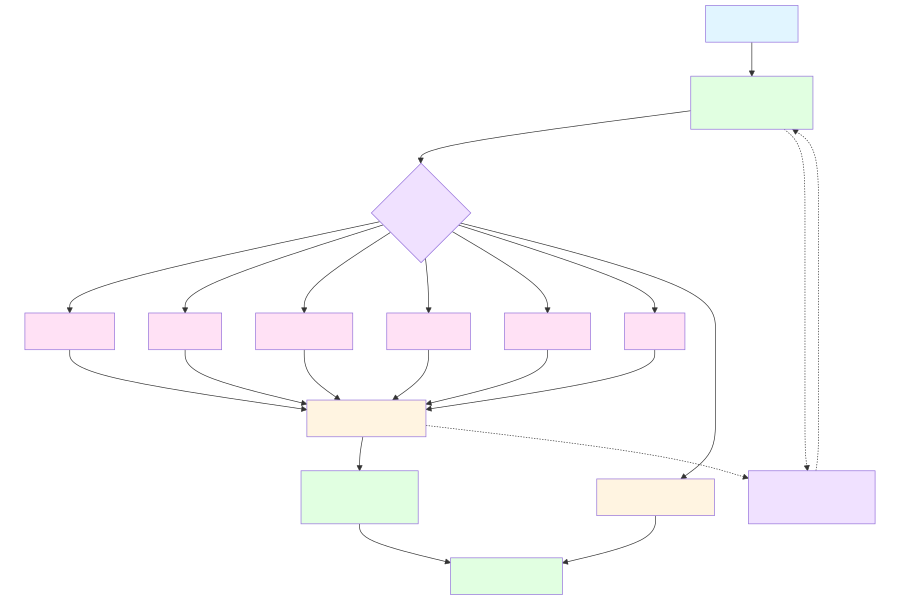

In [8]:
#@markdown   <p><font size="4" color='green'>  🧜‍♀️ Agent mit Tools-Architektur</font> </br></p>

diagram = """
graph TB
    A["User Input"] --> B["Agent Core<br/>LLM + Reasoning"]

    B --> C{Tool<br/>benötigt?}

    C -->|Berechnung| D1["calculator"]
    C -->|Internet| D2["search"]
    C -->|Aktienkurs| D3["stock_price"]
    C -->|Datei lesen| D4["read_file"]
    C -->|Datei schreiben| D5["write_file"]
    C -->|Wikipedia| D6["wiki"]
    C -->|Kein Tool| E["Direkte Antwort"]

    D1 --> F["Tool-Ergebnisse"]
    D2 --> F
    D3 --> F
    D4 --> F
    D5 --> F
    D6 --> F

    F --> G["LLM verarbeitet<br/>Ergebnisse"]
    G --> H["Finale Antwort"]
    E --> H

    I["Agent Scratchpad<br/>Gedächtnis"] -.-> B
    B -.-> I
    F -.-> I

    style A fill:#e1f5ff
    style B fill:#e1ffe1
    style C fill:#f0e1ff
    style D1 fill:#ffe1f5
    style D2 fill:#ffe1f5
    style D3 fill:#ffe1f5
    style D4 fill:#ffe1f5
    style D5 fill:#ffe1f5
    style D6 fill:#ffe1f5
    style E fill:#fff4e1
    style F fill:#fff4e1
    style G fill:#e1ffe1
    style H fill:#e1ffe1
    style I fill:#f0e1ff
"""
mermaid(diagram, width=900, height=600)

In [9]:
# 🔧 Agenten-Logik
from datetime import date
today = date.today().strftime("%d.%m.%Y")

# System-Prompt als String laden (mode="S") und Datum einsetzen
system_prompt = load_prompt("../05_prompt/tool_agent_system.md", mode="S").format(today=today)

# Agent mit create_agent erstellen
custom_agent = create_agent(
    model=llm,
    tools=tools,
    system_prompt=system_prompt,
)

FileNotFoundError: [Errno 2] No such file or directory: '../05_prompt/tool_agent_system.md'

In [ ]:
# 🔧 Test
input_text = f"""
Erstelle eine Datei 'notiz.txt' mit dem Inhalt 'Agenten können autonom agieren. 🤖'.
Wie ist der aktuelle XETRA Kurs der Aktie von Rheinmetall?
Lese die Datei 'notiz.txt' und verändere die Zeitform von Gegenwart in Zukunft.
Was ist die aktuelle Version von Python?
Was steht zu Taylor Swift auf Wikipedia.
"""

# ---------------⚠️ Workaround für Colab/Jupyter Stream-Problem -------------------------
# Redirecte stdout/stderr temporär, um OutStream-Fehler zu vermeiden
original_stdout = sys.stdout
original_stderr = sys.stderr
sys.stdout = io.StringIO()
sys.stderr = io.StringIO()

try:
    # Agent aufrufen mit korrektem Input-Format
    response = custom_agent.invoke({"messages": [{"role": "user", "content": input_text}]})
finally:
    # Stelle Original-Streams wieder her
    sys.stdout = original_stdout
    sys.stderr = original_stderr

In [ ]:
mprint("## 🛠️ Hands-On Agent")
mprint("---")

# Extrahiere letzte Nachricht
if isinstance(response, dict) and 'messages' in response:
    last_message = response['messages'][-1]
    output = last_message.content if hasattr(last_message, 'content') else str(last_message)

    # Alle Messages anzeigen (um den Prozess zu sehen)
    mprint("### Agent-Verlauf:")
    for i, msg in enumerate(response['messages'], 1):
        role = getattr(msg, 'type', 'unknown')
        content_str = str(msg.content if hasattr(msg, 'content') else msg)
        content_preview = content_str[:200]
        suffix = "..." if len(content_str) > 200 else ""
        mprint(f"{i}. {role}: {content_preview}{suffix}")

    mprint("")
    mprint("### Finale Antwort:")
    mprint(output)
else:
    mprint("### Output:")
    mprint(str(response))

# 5 | Middleware
---

**Middleware** fungiert als  Zwischenschicht im Datenfluss zwischen der Nutzereingabe und der Modellausgabe. Sie ermöglicht es, Prompts und Ergebnisse gezielt zu manipulieren, zu validieren oder anzureichern, ohne den eigentlichen Modellkern modifizieren zu müssen.

**Zentrale Aufgaben der Zwischenschichten:**

* **Vorverarbeitung (Preprocessing):** Bereinigung von Eingabedaten, Strukturierung von Abfragen oder Ergänzung durch Kontext (z. B. RAG – Retrieval Augmented Generation).
* **Kontrolle & Sicherheit:** Implementierung von Content-Filtern, PII-Anonymisierung (personenbezogene Daten) und Validierung von Eingabeparametern.
* **Nachbearbeitung (Postprocessing):** Formatierung der Rohdaten (z. B. in JSON), Kürzung von Texten oder Anreicherung der Antwort mit Metadaten.
* **Instrumentierung & Monitoring:** Systematisches Logging, Performance-Tracking sowie Debugging des gesamten Workflows.

Middleware bietet maximale **Flexibilität und Kontrolle** über den KI-Output. Damit sie jedoch nicht zum Flaschenhals wird, ist eine modulare und saubere Architektur essenziell – andernfalls steigt die Systemkomplexität schneller als der funktionale Mehrwert.

In [ ]:
#@markdown   <p><font size="4" color='green'>  🧜‍♀️ Prozess-Diagramm</font> </br></p>

diagram = """
flowchart TD

    A[User Input] --> B[before_model<br/>Was geht rein?]
    B --> C[MODEL<br/>LLM denkt nach]
    C --> D[after_model<br/>Was kam raus?]
    D --> E{Tool-Aufruf?}

    E -->|Nein| F[Fertig]
    E -->|Ja| G[wrap_tool_call<br/>Welches Tool? Mit welchen Args?]

    G --> B
"""
mermaid(diagram, width=800, height=600)

In [ ]:
# Importe für Mideelware
from langchain.agents import AgentState
from langchain.agents.middleware import before_model, after_model, wrap_tool_call
from langchain.tools.tool_node import ToolCallRequest
from langchain_core.messages import ToolMessage
from langchain_community.tools import DuckDuckGoSearchRun

In [ ]:
# ═══════════════════════════════════════════════════════════
# Middleware
# ═══════════════════════════════════════════════════════════

@before_model
def log_before(state: AgentState, runtime):
    """state + runtime als Parameter (nicht ModelRequest!)"""
    print(f"\n🧠 Model wird aufgerufen mit {len(state['messages'])} Nachrichten")
    for msg in state["messages"][-2:]:
        role = msg.type if hasattr(msg, "type") else "unknown"
        content = str(msg.content)[:80]
        print(f"   [{role}]: {content}")
    return None


@after_model
def log_after(state: AgentState, runtime):
    """state + runtime als Parameter"""
    msg = state["messages"][-1]
    if hasattr(msg, "tool_calls") and msg.tool_calls:
        print(f"⚡ Tool-Aufruf: {[tc['name'] for tc in msg.tool_calls]}")
    else:
        print(f"💬 Antwort generiert")
    return None


@wrap_tool_call
def log_tool(request: ToolCallRequest, handler):
    """request + handler als Parameter"""
    print(f"🔧 Führe aus: {request.tool_call['name']}({request.tool_call['args']})")
    result = handler(request)
    print(f"✅ Ergebnis: {str(result.content)[:100]}...")
    return result

In [ ]:
# ═══════════════════════════════════════════════════════════
# Agent erstellen und ausführen
# ═══════════════════════════════════════════════════════════

ddg_search = DuckDuckGoSearchRun(name="WebSearch")

agent = create_agent(
    model="openai:gpt-4o-mini",
    tools=[ddg_search],
    system_prompt="Du bist ein hilfreicher Assistent. Antworte auf Deutsch.",
    middleware=[log_before, log_after, log_tool]
)

result = agent.invoke({
    "messages": [{"role": "user", "content": "Wie ist das Wetter in Berlin?"}]
})

print("\n" + "=" * 50)
print("FINALE ANTWORT:")
print(result["messages"][-1].content)

# 6 | Wann braucht man einen Agent?
---

Die Entscheidung zwischen einem einfachen LLM und einem Agenten hängt von den spezifischen Anforderungen Ihrer Anwendung ab. Eine klare Entscheidungsmatrix hilft dabei, die richtige Technologie für den jeweiligen Anwendungsfall zu wählen und Ressourcen effizient einzusetzen.



Die Wahl der richtigen Technologie beginnt mit der Analyse der Aufgabenanforderungen. Während LLMs für viele Textverarbeitungsaufgaben ausreichen, sind Agenten unverzichtbar, wenn externe Interaktionen oder aktuelle Daten benötigt werden.

**Verwenden Sie einen Agenten wenn:**

+ Sie **aktuelle** oder **dynamische** Daten benötigen, die sich häufig ändern (Aktienkurse, Wetter, Nachrichten). Agenten können über APIs auf Live-Daten zugreifen und diese in ihre Antworten integrieren.

+ Präzise Berechnungen erforderlich sind, bei denen **Genauigkeit** kritisch ist. LLMs approximieren mathematische Operationen, während Agenten echte Rechner-Tools verwenden.

+ **Externe** Systeme angesprochen werden müssen, wie Datenbanken, APIs oder andere Services. Agenten können diese Integrationen nahtlos abwickeln.

+ Komplexe, **mehrstufige Prozesse** durchgeführt werden sollen, bei denen jeder Schritt vom vorherigen abhängt. Der Agent-Reasoning-Loop ist für solche Szenarien optimiert.

**Ein einfaches LLM reicht wenn:**

+ Reine Textverarbeitung ohne externe Daten im Fokus steht. Für Zusammenfassungen, Übersetzungen oder Textanalysen sind LLMs optimal.

+ Kreative Aufgaben gelöst werden sollen, wie das Schreiben von Geschichten, Gedichten oder Marketing-Texten. Hier sind die kreativen Fähigkeiten des LLMs gefragt.

+ Erklärungen oder Bildungsinhalt basierend auf allgemeinem Wissen benötigt werden. LLMs haben Zugang zu einem enormen Wissensfundus.

+ Statische Code-Generierung ohne externe Abhängigkeiten erforderlich ist. Für einfache Programmieraufgaben sind LLMs sehr effektiv.

<br>

**Die Faustregel lautet**:    
Wenn Sie Tools, aktuelle Daten oder externe Interaktionen benötigen, wählen Sie einen Agenten. Für reine Textverarbeitung reicht ein LLM aus.

# A | Aufgabe
---

Die Aufgabestellungen unten bieten Anregungen, Sie können aber auch gerne eine andere Herausforderung angehen.

<p><font color='black' size="5">
Kalkulation
</font></p>

Gegeben ist eine Datei, die eine Reihe von Gleichungen enthält.
Der Dateiname ist GenAI/02 data/gleichungen.txt

**Gleichung:**    
41748459 - 87226336    
92995162 * 46769739    
61530438 * 56074589    
95329602 + 45418854    
412907 + 3731910    
...

Verwenden Sie einen LangChain-Agenten mit einem Tool, um jede dieser Gleichungen zu berechnen, und erstellen Sie eine Datei ähnlich dieser:

**Ergebnisse:**  
41748459 - 87226336 = 45477877   
92995162 * 46769739 = 4349359455002718   
61530438 * 56074589 = 3450294021839982   
95329602 + 45418854 = 140748456   
412907 + 3731910 = 4144817   
... ...

